In [1]:
import pandas as pd
import numpy as np
import requests
import re
import os
import math
import itertools

# Matplotlib for plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

# download a bunch of Natural Language Processing libraries from the Natural Language Toolkit
# http://www.nltk.org/
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.probability import *
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

# Gensim is Topic modeling for humans
import logging, gensim, bz2
from gensim import corpora, models, similarities
from gensim.models.ldamodel import LdaModel


In [14]:
df = pd.read_csv("updated_results.csv", encoding='utf-8')

In [15]:
processed_reviews = pd.Series(df['processed'])

In [16]:
unprocessed = pd.Series(df['review'])

In [2]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
# use Pattern Analysis http://www.clips.ua.ac.be/pattern
pa = []
for i in processed_reviews:
    blob = TextBlob(i)
    for sentence in blob.sentences:
        print(sentence.sentiment)
        pa.append(sentence.sentiment)

Sentiment(polarity=0.03151530182780183, subjectivity=0.48260582010582)
Sentiment(polarity=-0.010516840882694542, subjectivity=0.45874241837656454)
Sentiment(polarity=0.06427247864747859, subjectivity=0.43247881810381805)
Sentiment(polarity=0.02894778690697057, subjectivity=0.4736054421768706)
Sentiment(polarity=-0.0016884531590413993, subjectivity=0.44419545596016174)
Sentiment(polarity=0.05068452380952384, subjectivity=0.5307738095238094)
Sentiment(polarity=0.13687441643323991, subjectivity=0.49557189542483643)
Sentiment(polarity=0.011809426911885938, subjectivity=0.4716904634527582)
Sentiment(polarity=0.05287507105688924, subjectivity=0.47005334732607434)
Sentiment(polarity=-0.0012484695755372438, subjectivity=0.4872458681669205)
Sentiment(polarity=0.030260243632336647, subjectivity=0.4054125138427463)
Sentiment(polarity=0.006664520430343229, subjectivity=0.44196531316784476)
Sentiment(polarity=0.05244756401006398, subjectivity=0.4695491314241312)
Sentiment(polarity=0.005582906563298

In [ ]:
# use Pattern Analysis over preprocessed text http://www.clips.ua.ac.be/pattern
pau = []
for i in unprocessed:
    blob = TextBlob(i)
    for sentence in blob.sentences:
        print(sentence.sentiment)
        pau.append(sentence.sentiment)

Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=0.375, subjectivity=0.75)
Sentiment(polarity=-0.08125, subjectivity=0.2833333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.50625)
Sentiment(polarity=0.2333333333333333, subjectivity=0.27499999999999997)
Sentiment(polarity=-0.4, subjectivity=0.4)
Sentiment(polarity=0.25, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.15, subjectivity=0.6625)
Sentiment(polarity=0.35, subjectivity=0.42500000000000004)
Sentiment(polarity=-0.4, subjectivity=0.4)
Sentiment(polarity=0.12743055555555555, subjectivity=0.6055555555555555)
Sentiment(polarity=0.3375, subjectivity=0.7375)
Sentiment(polarity=0.22000000000000003, subjectivity=0.4066666666666666)
Sentiment(polarity=0.0, subjectiv

In [ ]:
# use Naive Bayes Analyzer
'''
nba = []
for i in processed_reviews:
    blob = TextBlob(i, analyzer=NaiveBayesAnalyzer())
    for sentence in blob.sentences:
        print(sentence.sentiment)
        nba.append(sentence.sentiment)
'''

In [ ]:
df1 = pd.DataFrame(pa, columns = ['polarity', 'subjectivity'])
df2 = pd.DataFrame(pau, columns = ['full_polarity','full_subjectivity'])

In [ ]:
df1.head()

In [ ]:
add_sent = pd.concat([df, df1, df2], axis=1, join_axes=[df1.index])

In [ ]:
add_sent.head()

In [ ]:
add_sent.to_csv('results_with_pattern_analysis.csv', encoding='utf-8', index=False)

In [ ]:
add_sent.plot('score_100', 'polarity',  kind='scatter', title="polarity vs. score")


In [ ]:
rev_pol = add_sent.groupby('reviewer').mean()
rev_pol.plot('score_100', 'polarity', kind='scatter', title="average score by reviewer vs. polarity")
rev_pol.plot('score_100', 'subjectivity', kind='scatter', title="average score by reviewer vs. polarity", color='green')

In [95]:
import statsmodels.formula.api as smf

In [96]:
est = smf.ols(formula='score_100 ~ polarity', data=rev_pol).fit()

In [97]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              score_100   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     30.63
Date:                Tue, 02 Jun 2015   Prob (F-statistic):           1.64e-07
Time:                        13:26:49   Log-Likelihood:                -488.23
No. Observations:                 133   AIC:                             980.5
Df Residuals:                     131   BIC:                             986.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     62.3068      1.839     33.878      0.000        58.669    65.945
polarity     107.9902     19.513      5.534      0.000        69.390   146.591
==============================================================================
Omnibus:                       27.569   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.060
Skew:                          -0.613   Prob(JB):                     5.65e-24
Kurtosis:                       7.221   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
rpa = pd.read_csv("results_with_pattern_analysis.csv", encoding='utf-8')

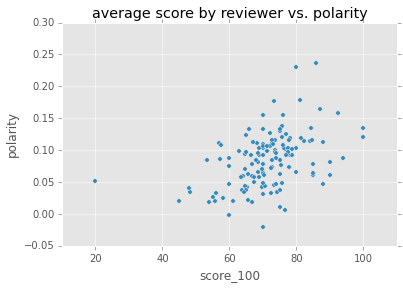

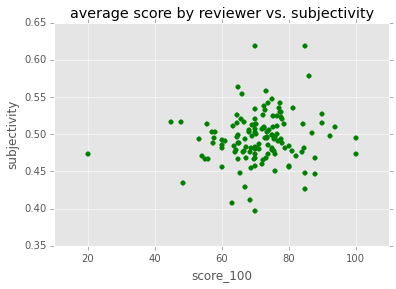

In [5]:
rev_pol = rpa.groupby('reviewer').mean()
rev_pol.plot('score_100', 'polarity', kind='scatter', title="average score by reviewer vs. polarity")
rev_pol.plot('score_100', 'subjectivity', kind='scatter', title="average score by reviewer vs. subjectivity", color='green')

In [7]:
df3 = rpa.groupby('reviewer').mean()

In [8]:
print df3.sort('subjectivity')

                    Unnamed: 0     score   score_100  review_length  polarity  \
reviewer                                                                        
Marc Nix            927.000000  7.000000   70.000000     758.000000  0.092365   
Richard George     1409.000000  6.300000   63.000000     544.000000  0.097959   
Lucas M. Thomas    1397.500000  6.850000   68.500000     778.000000  0.080919   
Rob Smith           916.000000  8.500000   85.000000    1134.000000  0.078592   
Suriel Vazquez      909.000000  6.700000   67.000000     950.000000  0.112601   
Bob Fekete         1161.666667  4.833333   48.333333     518.666667  0.034270   
Scott Lowe         1182.000000  8.800000   88.000000    2349.000000  0.112731   
John Polson        1381.500000  6.550000   65.500000     901.000000  0.021098   
Danny O'Dwyer      1666.500000  8.500000   85.000000    1173.000000  0.061658   
Bobby Amos         1160.000000  7.600000   76.000000     877.000000  0.154999   
Mike Mitchell       831.0000